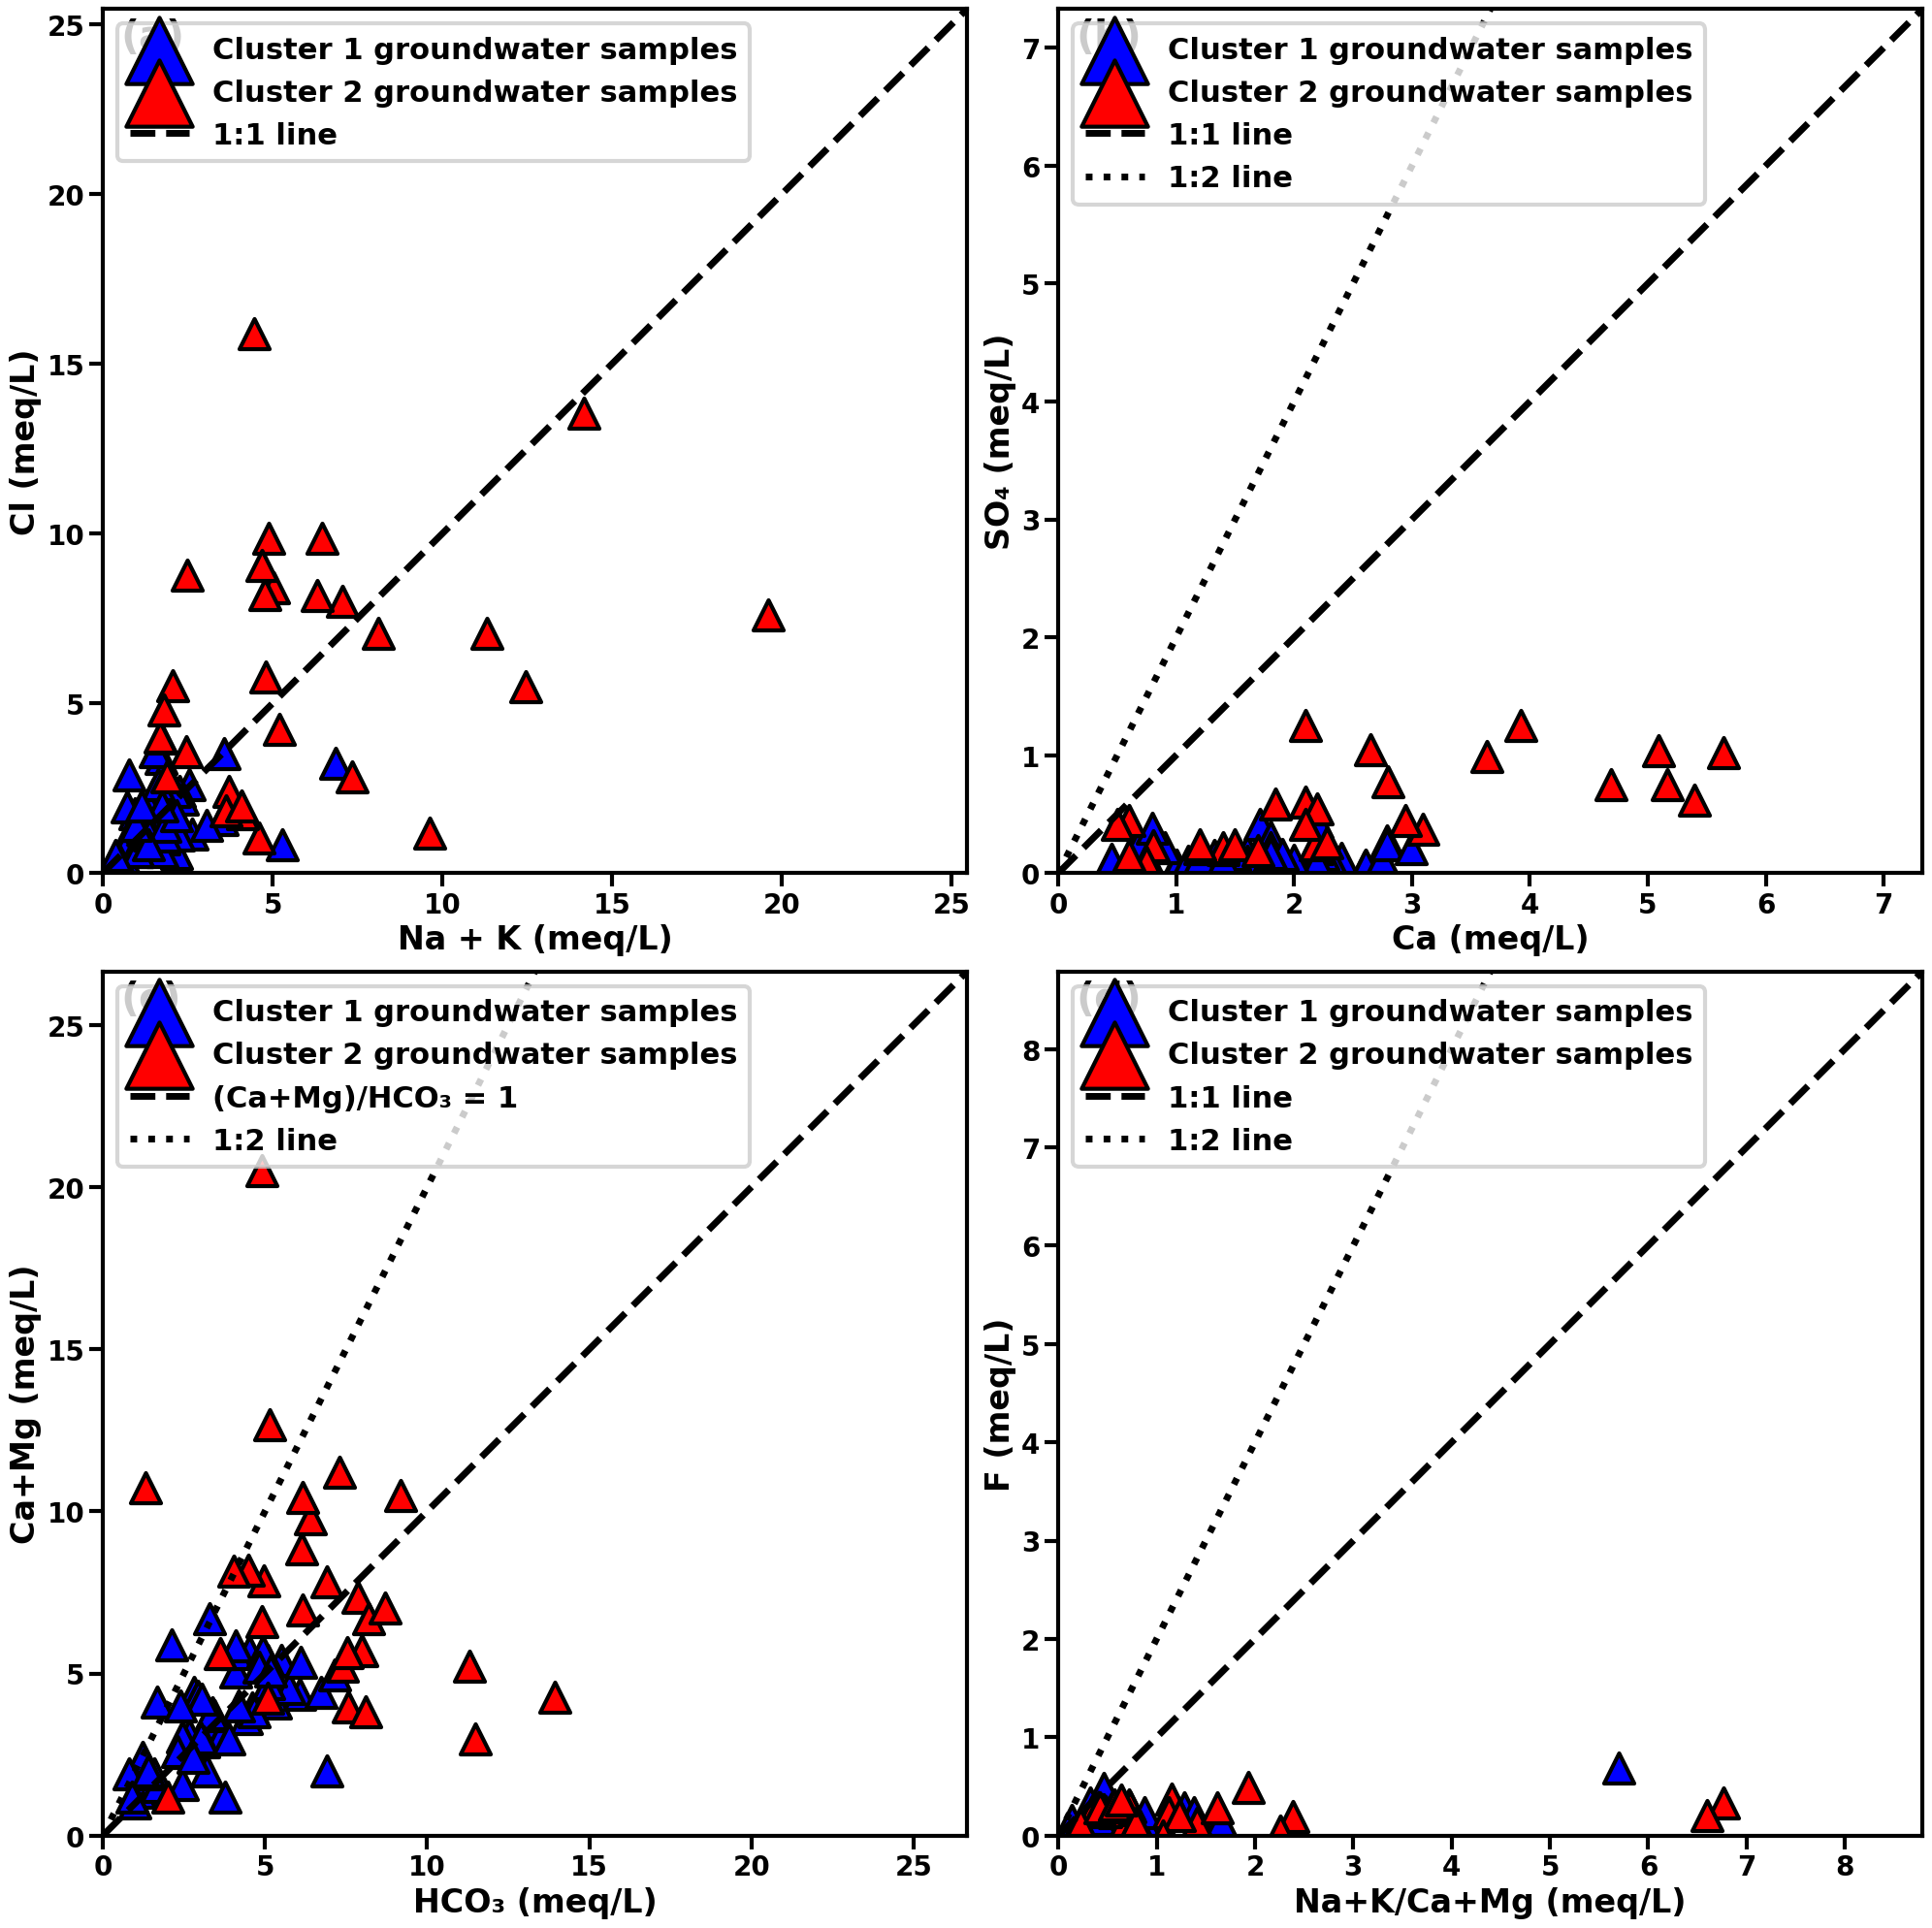

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(20, 20))

def plot_panel(ax, df, xcol, ycol, xlabel, ylabel,
               one_to_one=True, one_to_two=False, special_label=None):

    df.columns = df.columns.str.strip()

    blue = df[df["colour"].str.lower() == "blue"]
    red = df[df["colour"].str.lower() == "red"]

   
    ax.scatter(blue[xcol], blue[ycol],
               color="blue", marker="^",
               s=500,                 # increased size
               edgecolors='black',
               linewidth=3,
               label="Cluster 1 groundwater samples")

    ax.scatter(red[xcol], red[ycol],
               color="red", marker="^",
               s=500,                 # increased size
               edgecolors='black',
               linewidth=3,
               label="Cluster 2 groundwater samples")

    
    max_data = max(df[xcol].max(), df[ycol].max())
    upper = max_data * 1.30
    x = np.linspace(0, upper, 500)

   
    if one_to_one:
        label = special_label if special_label else "1:1 line"
        ax.plot(x, x, '--', color='black',
                linewidth=5, label=label)

    if one_to_two:
        ax.plot(x, 2*x, ':', color='black',
                linewidth=5, label="1:2 line")

    ax.set_xlim(0, upper)
    ax.set_ylim(0, upper)
    ax.set_aspect('equal', adjustable='box')

    
    ax.set_xlabel(xlabel, fontsize=24, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=24, fontweight='bold')

   
    ax.tick_params(axis='both',
                   labelsize=20,
                   width=3,
                   length=10,
                   colors='black')

    for tick in ax.get_xticklabels() + ax.get_yticklabels():
        tick.set_fontweight('bold')

   
    for spine in ax.spines.values():
        spine.set_linewidth(3)

    
    legend = ax.legend(loc="upper left",
                       fontsize=22,
                       frameon=True,
                       markerscale=2.2)

    for text in legend.get_texts():
        text.set_fontweight('bold')

    legend.get_frame().set_linewidth(3)



df2 = pd.read_excel("waterquality.xlsx", sheet_name="Sheet2")
plot_panel(axes[0,0], df2,
           "Na+K", "Cl",
           "Na + K (meq/L)", "Cl (meq/L)")

axes[0,0].text(0.02, 0.99, "(a)",
               transform=axes[0,0].transAxes,
               fontsize=30, fontweight='bold', va='top')



df1 = pd.read_excel("waterquality.xlsx", sheet_name="Sheet1")
plot_panel(axes[0,1], df1,
           "Ca", "SO4",
           "Ca (meq/L)", "SO₄ (meq/L)",
           one_to_two=True)

axes[0,1].text(0.02, 0.99, "(b)",
               transform=axes[0,1].transAxes,
               fontsize=30, fontweight='bold', va='top')



df3 = pd.read_excel("waterquality.xlsx", sheet_name="Sheet3")
plot_panel(axes[1,0], df3,
           "HCO3", "Ca+Mg",
           "HCO₃ (meq/L)", "Ca+Mg (meq/L)",
           one_to_two=True,
           special_label="(Ca+Mg)/HCO₃ = 1")

axes[1,0].text(0.02, 0.99, "(c)",
               transform=axes[1,0].transAxes,
               fontsize=30, fontweight='bold', va='top')



df4 = pd.read_excel("waterquality.xlsx", sheet_name="Sheet4")
plot_panel(axes[1,1], df4,
           "Na+K/Ca+Mg", "F",
           "Na+K/Ca+Mg (meq/L)", "F (meq/L)",
           one_to_two=True)

axes[1,1].text(0.02, 0.99, "(d)",
               transform=axes[1,1].transAxes,
               fontsize=30, fontweight='bold', va='top')


plt.tight_layout()

plt.savefig("Combined_2x2_MAXIMUM_IMPACT.tiff",
            format="tiff",
            dpi=600,
            bbox_inches='tight')

plt.show()
